In [2]:
%run SAT_help_functions.ipynb

datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
#dataset_names = ['Dutilh 2013', 'Dutilh 2019', 'Evans 2017', 'Lerche 2017', 'Rae 2014', 'Wagenmakers 2008']
dataset_names = ['D13', 'D19', 'E17', 'L17', 'R14', 'W08']


## Using function to plot

In [3]:


def BIC_to_likelihood(BIC, k, n):
    x = np.exp((-BIC+k*np.log(n))/2)
    if x < np.log(2.2E-308):
        return 2.2E-308
    if x > np.log(1.7E+308):
        return 1.7E+308
    return x

In [4]:
def get_BIC_EJ(model):
    
    df = pd.read_csv("Parameter Estimates/"+model+"resultWagenmakers2008.csv")
    df_n = pd.read_csv("Parameter Estimates/n_Wagenmakers2008.csv")

    df["n"] = df_n["N"]
    df["k"] = [len(df.columns)-5]*len(df)
    print(df.loc[0,"k"])
    df["ll"] = df["BIC"] - df["k"]*np.log(df["n"])

    BIC = np.array(df.groupby('Participant')['ll'].sum() + df.groupby('Participant')['k'].mean()*np.log(df.groupby('Participant')['n'].sum()))
    return BIC

In [58]:
model = "DDM2v2a2ter"
df = pd.read_csv("Parameter Estimates/"+model+"resultWagenmakers2008.csv")
df_n = pd.read_csv("Parameter Estimates/n_Wagenmakers2008.csv")

df["n"] = df_n["N"]
df["k"] = [len(df.columns)-5]*len(df)
df["ll"] = df["BIC"] - df["k"]*np.log(df["n"])

BIC = np.array(df.groupby('Participant')['ll'].sum() + df.groupby('Participant')['k'].mean()*np.log(df.groupby('Participant')['n'].sum()))

In [80]:
df

,Unnamed: 0,Drift Rate Speed,Drift Rate Accuracy,Boundary Separation Speed,aprimeSpeed,lamSpeed,kSpeed,Boundary Separation Accuracy,aprimeAcc,lamAcc,kAcc,Non-decision Time Speed,Non-decision Time Accuracy,BIC,Frequency,Participant
0,0,2.593250,3.318136,1.118918,0.561571,0.112213,3.550878e+00,1.780128,0.046788,0.017332,0.151892,0.293228,0.360421,-239.374496,1,1
1,0,2.249209,1.903532,1.092141,0.173769,0.057463,2.680440e-01,1.029907,0.535433,0.213696,3.962238,0.366184,0.291738,-117.409138,2,1
2,0,0.818228,1.524225,1.012962,0.064707,0.459577,3.001363e-01,1.008002,0.464946,0.111653,1.188523,0.323677,0.350636,7.103192,3,1
3,0,2.323499,2.776816,1.230000,0.062027,0.895260,1.933701e-10,1.379387,0.469295,0.010893,1.382416,0.343146,0.399281,-145.218176,4,1
4,0,2.381239,1.909214,3.824367,0.566288,0.248273,2.247675e+00,2.380000,0.415570,0.344717,2.612836,0.127549,0.127159,-156.258258,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,2.089593,2.349140,1.051698,0.389387,0.237184,2.716410e+00,1.250000,0.770580,0.223656,0.526776,0.278634,0.380189,-199.688904,2,17
92,0,1.503049,1.373224,1.018094,0.436554,0.221498,2.211523e+00,3.987370,0.758379,0.276484,1.998186,0.266043,0.200540,6.437565,3,17
93,0,1.724391,2.095616,1.000195,0.491675,0.240013,3.246482e+00,2.661748,0.938614,0.419020,2.470439,0.260960,0.190208,-129.823989,4,17
94,0,2.082870,2.035871,1.010000,0.461557,0.251110,2.695519e+00,1.523539,0.573471,0.398191,0.918457,0.286625,0.357671,-130.132033,5,17


In [68]:
BIC = np.array(df.groupby('Participant')['ll'].sum() + df.groupby('Participant')['k'].mean()*np.log(df.groupby('Participant')['n'].sum()))

<Axes: xlabel='Frequency', ylabel='Boundary Separation Speed'>

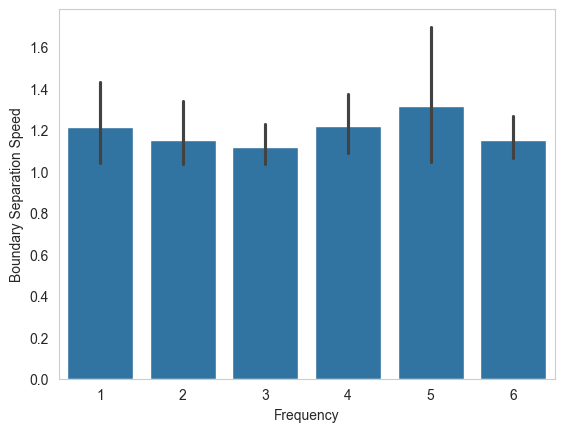

In [75]:
sns.barplot(df, x = "Frequency", y = "Boundary Separation Speed")

<Axes: xlabel='Frequency', ylabel='Boundary Separation Accuracy'>

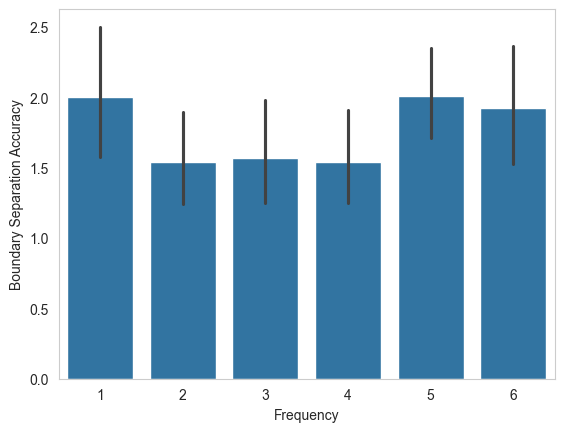

In [76]:
sns.barplot(df, x = "Frequency", y = "Boundary Separation Accuracy")

In [5]:
df = pd.read_csv("Parameter Estimates/OUM2v2k2terresultWagenmakers2008.csv")

<Axes: xlabel='Frequency', ylabel='Boundary Separation'>

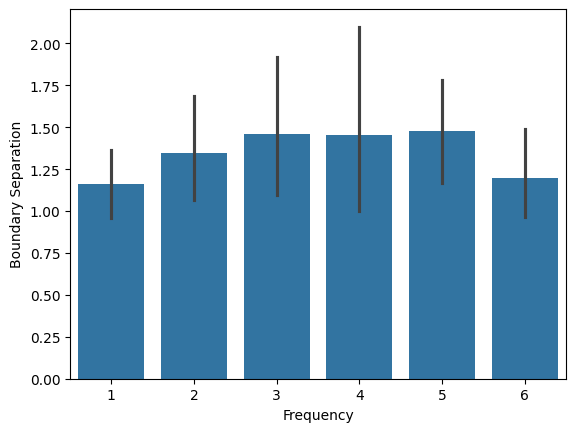

In [6]:
sns.barplot(df, x = "Frequency", y = "Boundary Separation")

In [5]:
def BIC_to_exp(BIC):
    return np.exp(-BIC/2)
def BIC_to_likelihood(BIC, k, n):
    return np.exp((-BIC+k*np.log(n))/2)
#dataset = "Dutilh2019"
#models = ["DDM2v2c2ter","OUM2v2k2ter"] 
#sortby = "OUM2v2k2ter"
def plot_BIC_comparison(ax,dataset, models, sortby = "OUM2v2k2ter"):

    BIC_all = pd.DataFrame(columns = models)
    for model in models:
        if dataset=="Wagenmakers2008":
            #BIC_all[model] = get_BIC_EJ(model)
            #print(pd.read_csv("Parameter Estimates/"+model+"Combinedresult"+dataset+".csv"))
            BIC_all[model] = pd.read_csv("Parameter Estimates/"+model+"Combinedresult"+dataset+".csv")[['BIC']]#1
        else:
            if model == "DDM2v1sv2a2ter" or model == "DDMfull":
                bic_dir = "/Users/wangjiashun/Desktop/Research_on_SAT/datasets/transformed/"+model+"_"
                BIC_all[model] = pd.read_csv(bic_dir+dataset+".csv").astype('float64')[['BIC']]                
            else:
                BIC_all[model] = pd.read_csv("Parameter Estimates/"+model+"result"+dataset+".csv")[['BIC']]#2
    # solving the numerical issue
    for i in range(len(BIC_all)):
        tmp_max = np.max(np.array(BIC_all.loc[[i]]))
        tmp_min = np.min(np.array(BIC_all.loc[[i]]))
        np_max = -np.log(2.2E-308)/2 # 354
        np_min = -np.log(1.7E+308)/2 # -354

        if tmp_max > np_max and tmp_min < np_min:
            for model in models:
                if BIC_all.loc[i,model] > np_max:
                    BIC_all.loc[i,model] = np_max
                if BIC_all.loc[i,model] < np_min:
                    BIC_all.loc[i,model] = np_min

        elif tmp_max > np_max and tmp_min > np_min:
            dif_max = tmp_max-np_max
            BIC_all.loc[[i]] -= dif_max
        elif tmp_min < np_min and tmp_max < np_max:
            dif_min = tmp_min - np_min
            BIC_all.loc[[i]] -= dif_min
    #return BIC_all
    for model in models:
        BIC_all[model] = BIC_to_exp(BIC_all[model])

    BIC_all["Sum"] = BIC_all.sum(axis = 1)

    for model in models:
        BIC_all[model] = BIC_all[model]/BIC_all["Sum"]

    BIC_all = BIC_all.drop(labels = 'Sum',axis = 1)
    BIC_all = BIC_all.sort_values(by = sortby, axis = 0)
    BIC_all = BIC_all.reset_index(drop=True)
    BIC_all.index += 1
    if models==["DDM2v2a2ter","OUM2v2k2ter"]:
        color=["#4d7b93", "#7262ac"]#["#0E8585", "#7262ac"] #["#ff7f0e", "#1f77b4"] 7E4909
    elif models==["OUM2v2a2ter","OUM2v2k2ter"]:
        color= ["#b45dbb",'#7262ac'] #["#cfcfe5",'#7262ac'] #["#a1c9f4",'#1f77b4']
    elif models == ["OUM2v2a2k2ter","OUM2v2k2ter","OUM2k2ter"]:
        color=["#a1c9f4",'#699ADD','#1f77b4'] #3179C6 88BDDF
    #elif models == ["OUM2v2a2k2ter","OUM2v2k2ter"]:
    #    color=['#699ADD','#1f77b4']
    elif models == ["DDM2v2a2Weibull2ter","OUM2v2k2ter"] :
        color= ["#298c8c", "#7262ac"]#["#2e974e", "#7262ac"] #["#F29A2E", "#1f77b4"]
    else:
        color= ["#b45dbb",'#7262ac'] 
    

    return BIC_all.plot(ax = ax, kind='bar', legend =False, stacked=True, width=1,edgecolor='black'
                        ,color=color)

# DDM vs OUMk    ["#ff7f0e", "#1f77b4"]

# OUMa vs OUMk   ["#a1c9f4",'#1f77b4']

# DDMc vs OUMk   ["#F29A2E", "#1f77b4"]


In [9]:
def plot_all_datasets_flat(models, labels, sortby, xlabelsize=20, titlesize = 24, figsize=(30, 4)):
    ticks = [0, 0.5, 1]
    sns.set_style("whitegrid", {'axes.grid' : False})
    figure, axes = plt.subplots(1,6,figsize=figsize)
    for i in range(6):
        plot_BIC_comparison(ax = axes[i],dataset = datasets[i], models = models, sortby = sortby)
        axes[i].set_title(dataset_names[i],fontsize = titlesize, weight='bold', fontname='Arial')
        axes[i].set_xlabel("Participants", fontsize = xlabelsize, fontname='Arial')
        axes[i].set_ylim(0,1)
        if i==5: # avoid weird legend
            axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=16, frameon=False)

        axes[i].axhline(y=0.5,xmin=0.02,xmax=0.98,linestyle="--",color='black') 
        axes[i].tick_params(axis='y', which='major', labelsize=16)
        axes[i].tick_params(bottom = False,labelbottom = False,left=False, right=False)
        axes[i].axis('off')
        #axes[i].tick_params(axis='x', which='major', labelsize=7)

        axes[i].set_yticks(ticks)
    axes[0].set_ylabel('Model Weight', fontsize=xlabelsize, fontname='Arial')
    #axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=10, frameon=False)


In [10]:
def plot_all_datasets_flat_fig(models, labels, sortby, xlabelsize=20, titlesize = 24, figsize=(30, 4),axes = None):
    ticks = [0, 0.5, 1]
    sns.set_style("whitegrid", {'axes.grid' : False})
    #figure, axes = plt.subplots(1,6,figsize=figsize)
    for i in range(6):
        plot_BIC_comparison(ax = axes[i],dataset = datasets[i], models = models, sortby = sortby)
        #axes[i].set_title(dataset_names[i],fontsize = titlesize, weight='bold', fontname='Arial')
        axes[i].set_xlabel("Participants", fontsize = xlabelsize, fontname='Arial')
        axes[i].set_ylim(0,1)
        if i==5: # avoid weird legend
            axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=16, frameon=False)

        axes[i].axhline(y=0.5,xmin=0.02,xmax=0.98,linestyle="--",color='black') 
        axes[i].tick_params(axis='y', which='major', labelsize=16)
        axes[i].tick_params(left = False, right=False, bottom = False, 
                            labelright = False, labelleft = False, labelbottom = False)

        #axes[i].tick_params(axis='x', which='major', labelsize=7)
        axes[i].axis('off')
        #axes[i].set_yticks(ticks)
        #axes[0].set_ylabel('Model Weight', fontsize=xlabelsize, fontname='Arial')
    #axes[0].set_ylabel('Model Weight', fontsize=xlabelsize, fontname='Arial')
    
    #axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=10, frameon=False)


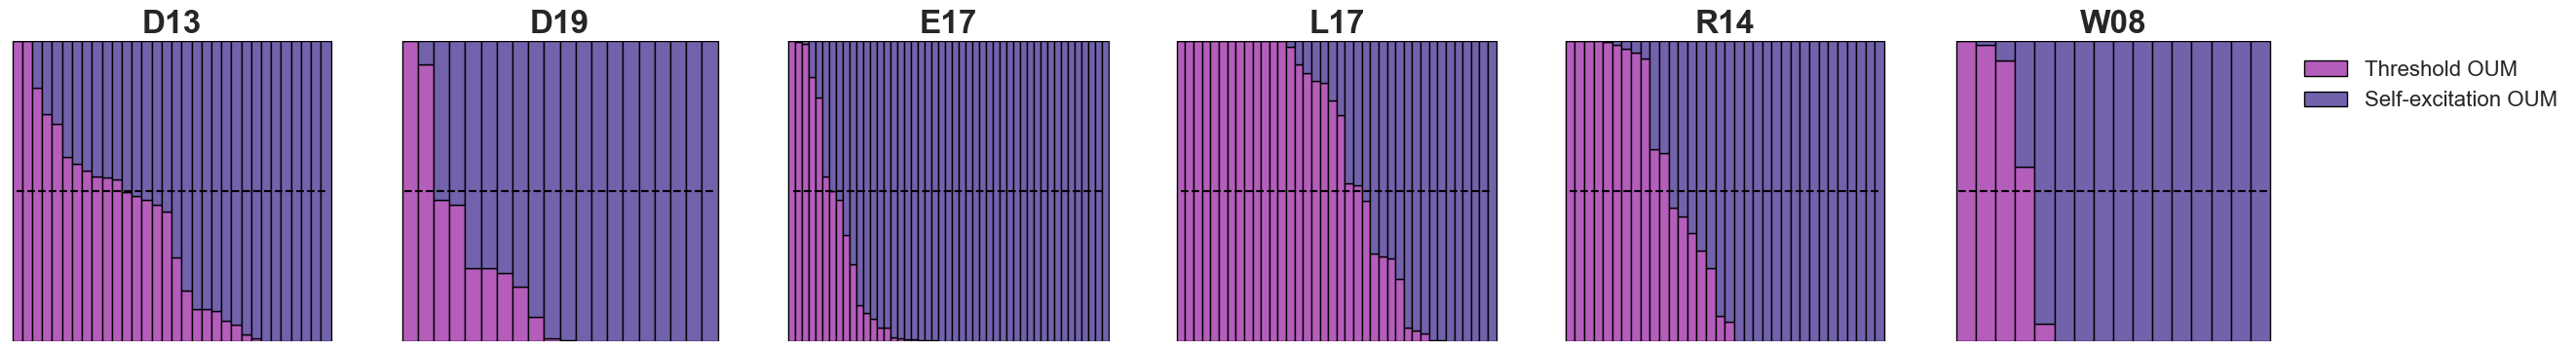

In [112]:
models = ["OUM2v2a2ter","OUM2v2k2ter"] 
labels = ["Threshold OUM","Self-excitation OUM"] 
sortby = "OUM2v2k2ter"
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

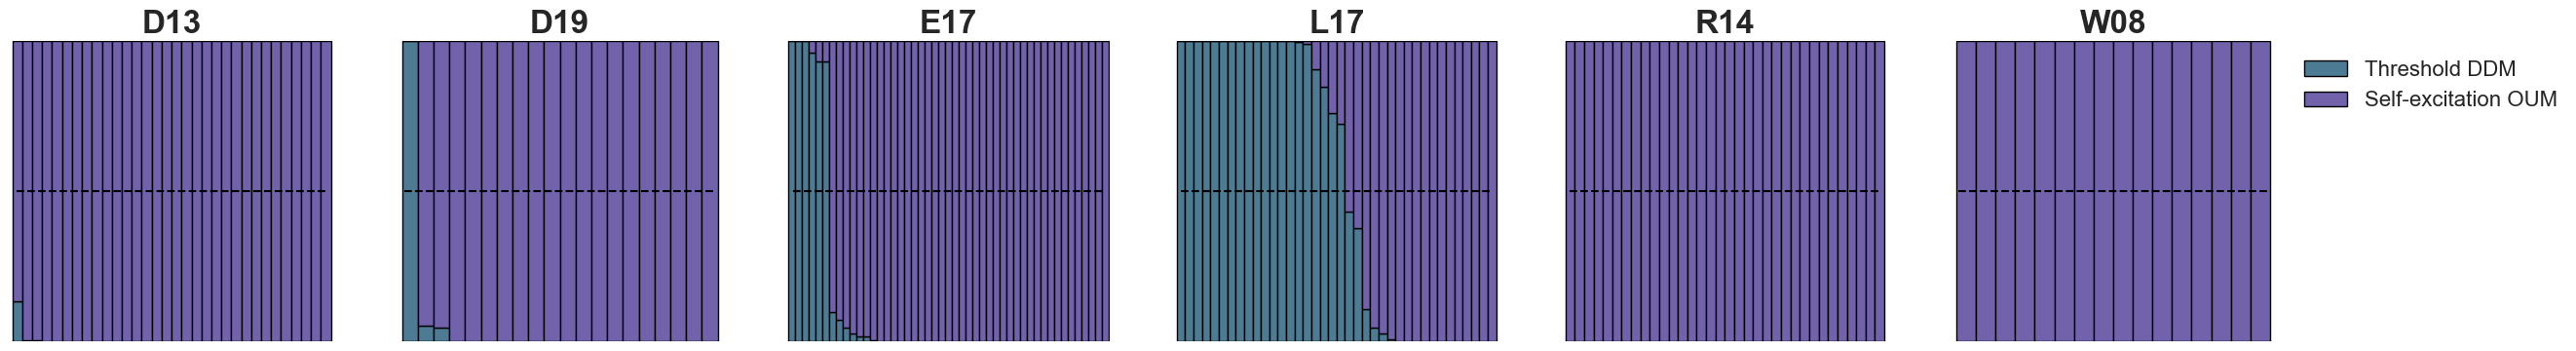

In [113]:
models = ["DDM2v2a2ter","OUM2v2k2ter"] 
labels = ["Threshold DDM","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

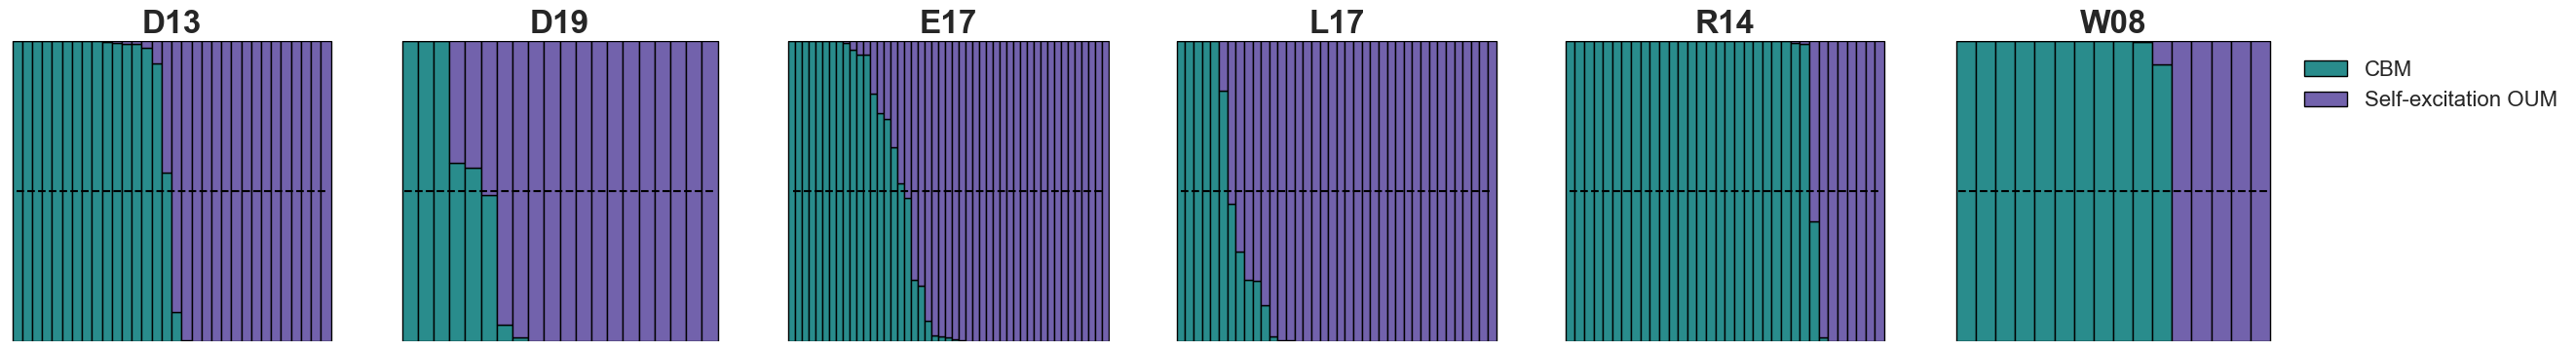

In [115]:
models = ["DDM2v2a2Weibull2ter","OUM2v2k2ter"] 
labels = ["CBM","Self-excitation OUM"] 
sortby = "OUM2v2k2ter"
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

## Supplementary materials

In [8]:
def plot_all_datasets_flat_all(models, labels, sortby, xlabelsize=20, titlesize = 24, figsize=(30, 4),axes=None):
    
    ticks = [0, 0.5, 1]
    sns.set_style("whitegrid", {'axes.grid' : False})
    if len(axes==None)==1:
        figure, axes = plt.subplots(1,6,figsize=figsize)
    for i in range(6):
        plot_BIC_comparison(ax = axes[i],dataset = datasets[i], models = models, sortby = sortby)
        #axes[i].set_title(dataset_names[i],fontsize = titlesize, weight='bold', fontname='Arial')
        axes[i].set_xlabel("Participants", fontsize = xlabelsize, fontname='Arial')
        axes[i].set_ylim(0,1)
        if i==5: # avoid weird legend
            axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=16, frameon=False)

        axes[i].axhline(y=0.5,xmin=0.02,xmax=0.98,linestyle="--",color='black') 
        axes[i].tick_params(axis='y', which='major', labelsize=16)
        axes[i].tick_params(bottom = False,labelbottom = False,left=False, right=False)
        axes[i].axis('off')
        #axes[i].tick_params(axis='x', which='major', labelsize=7)

        axes[i].set_yticks(ticks)
    axes[0].set_ylabel('Model Weight', fontsize=xlabelsize, fontname='Arial')
    #axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=10, frameon=False)


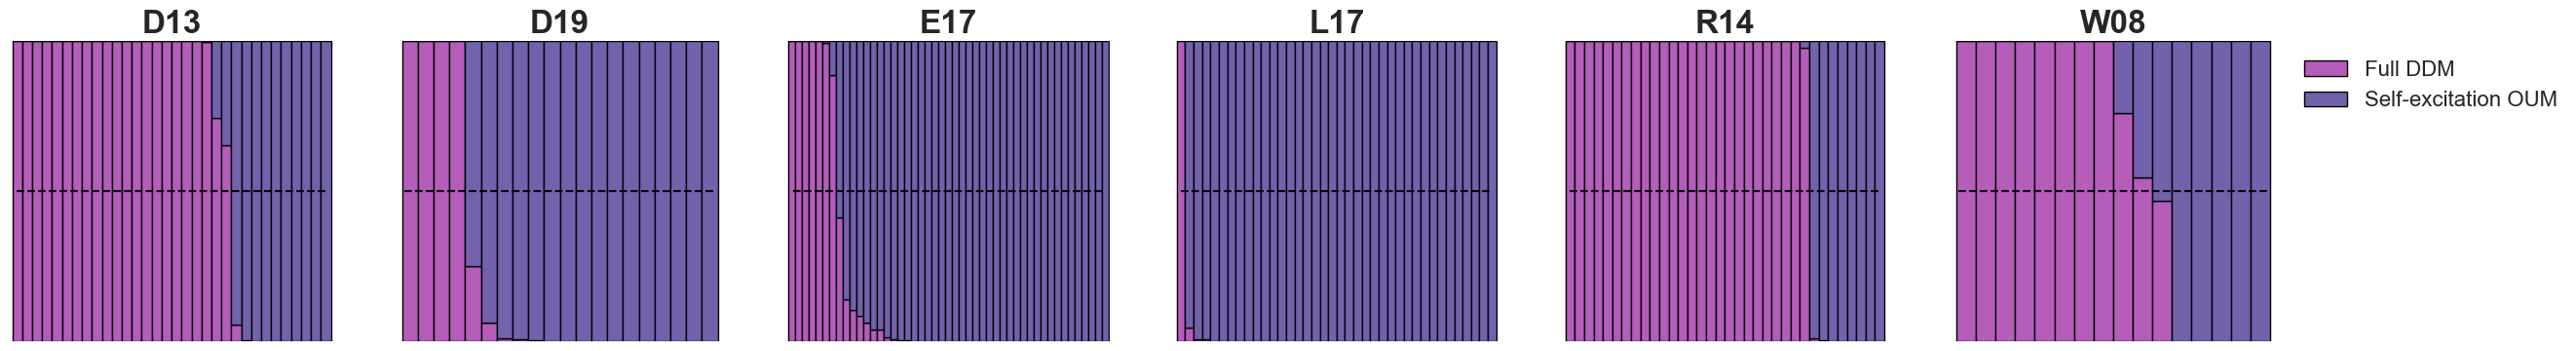

In [36]:
models = ["DDMfull","OUM2v2k2ter"] 
labels = ["Full DDM","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

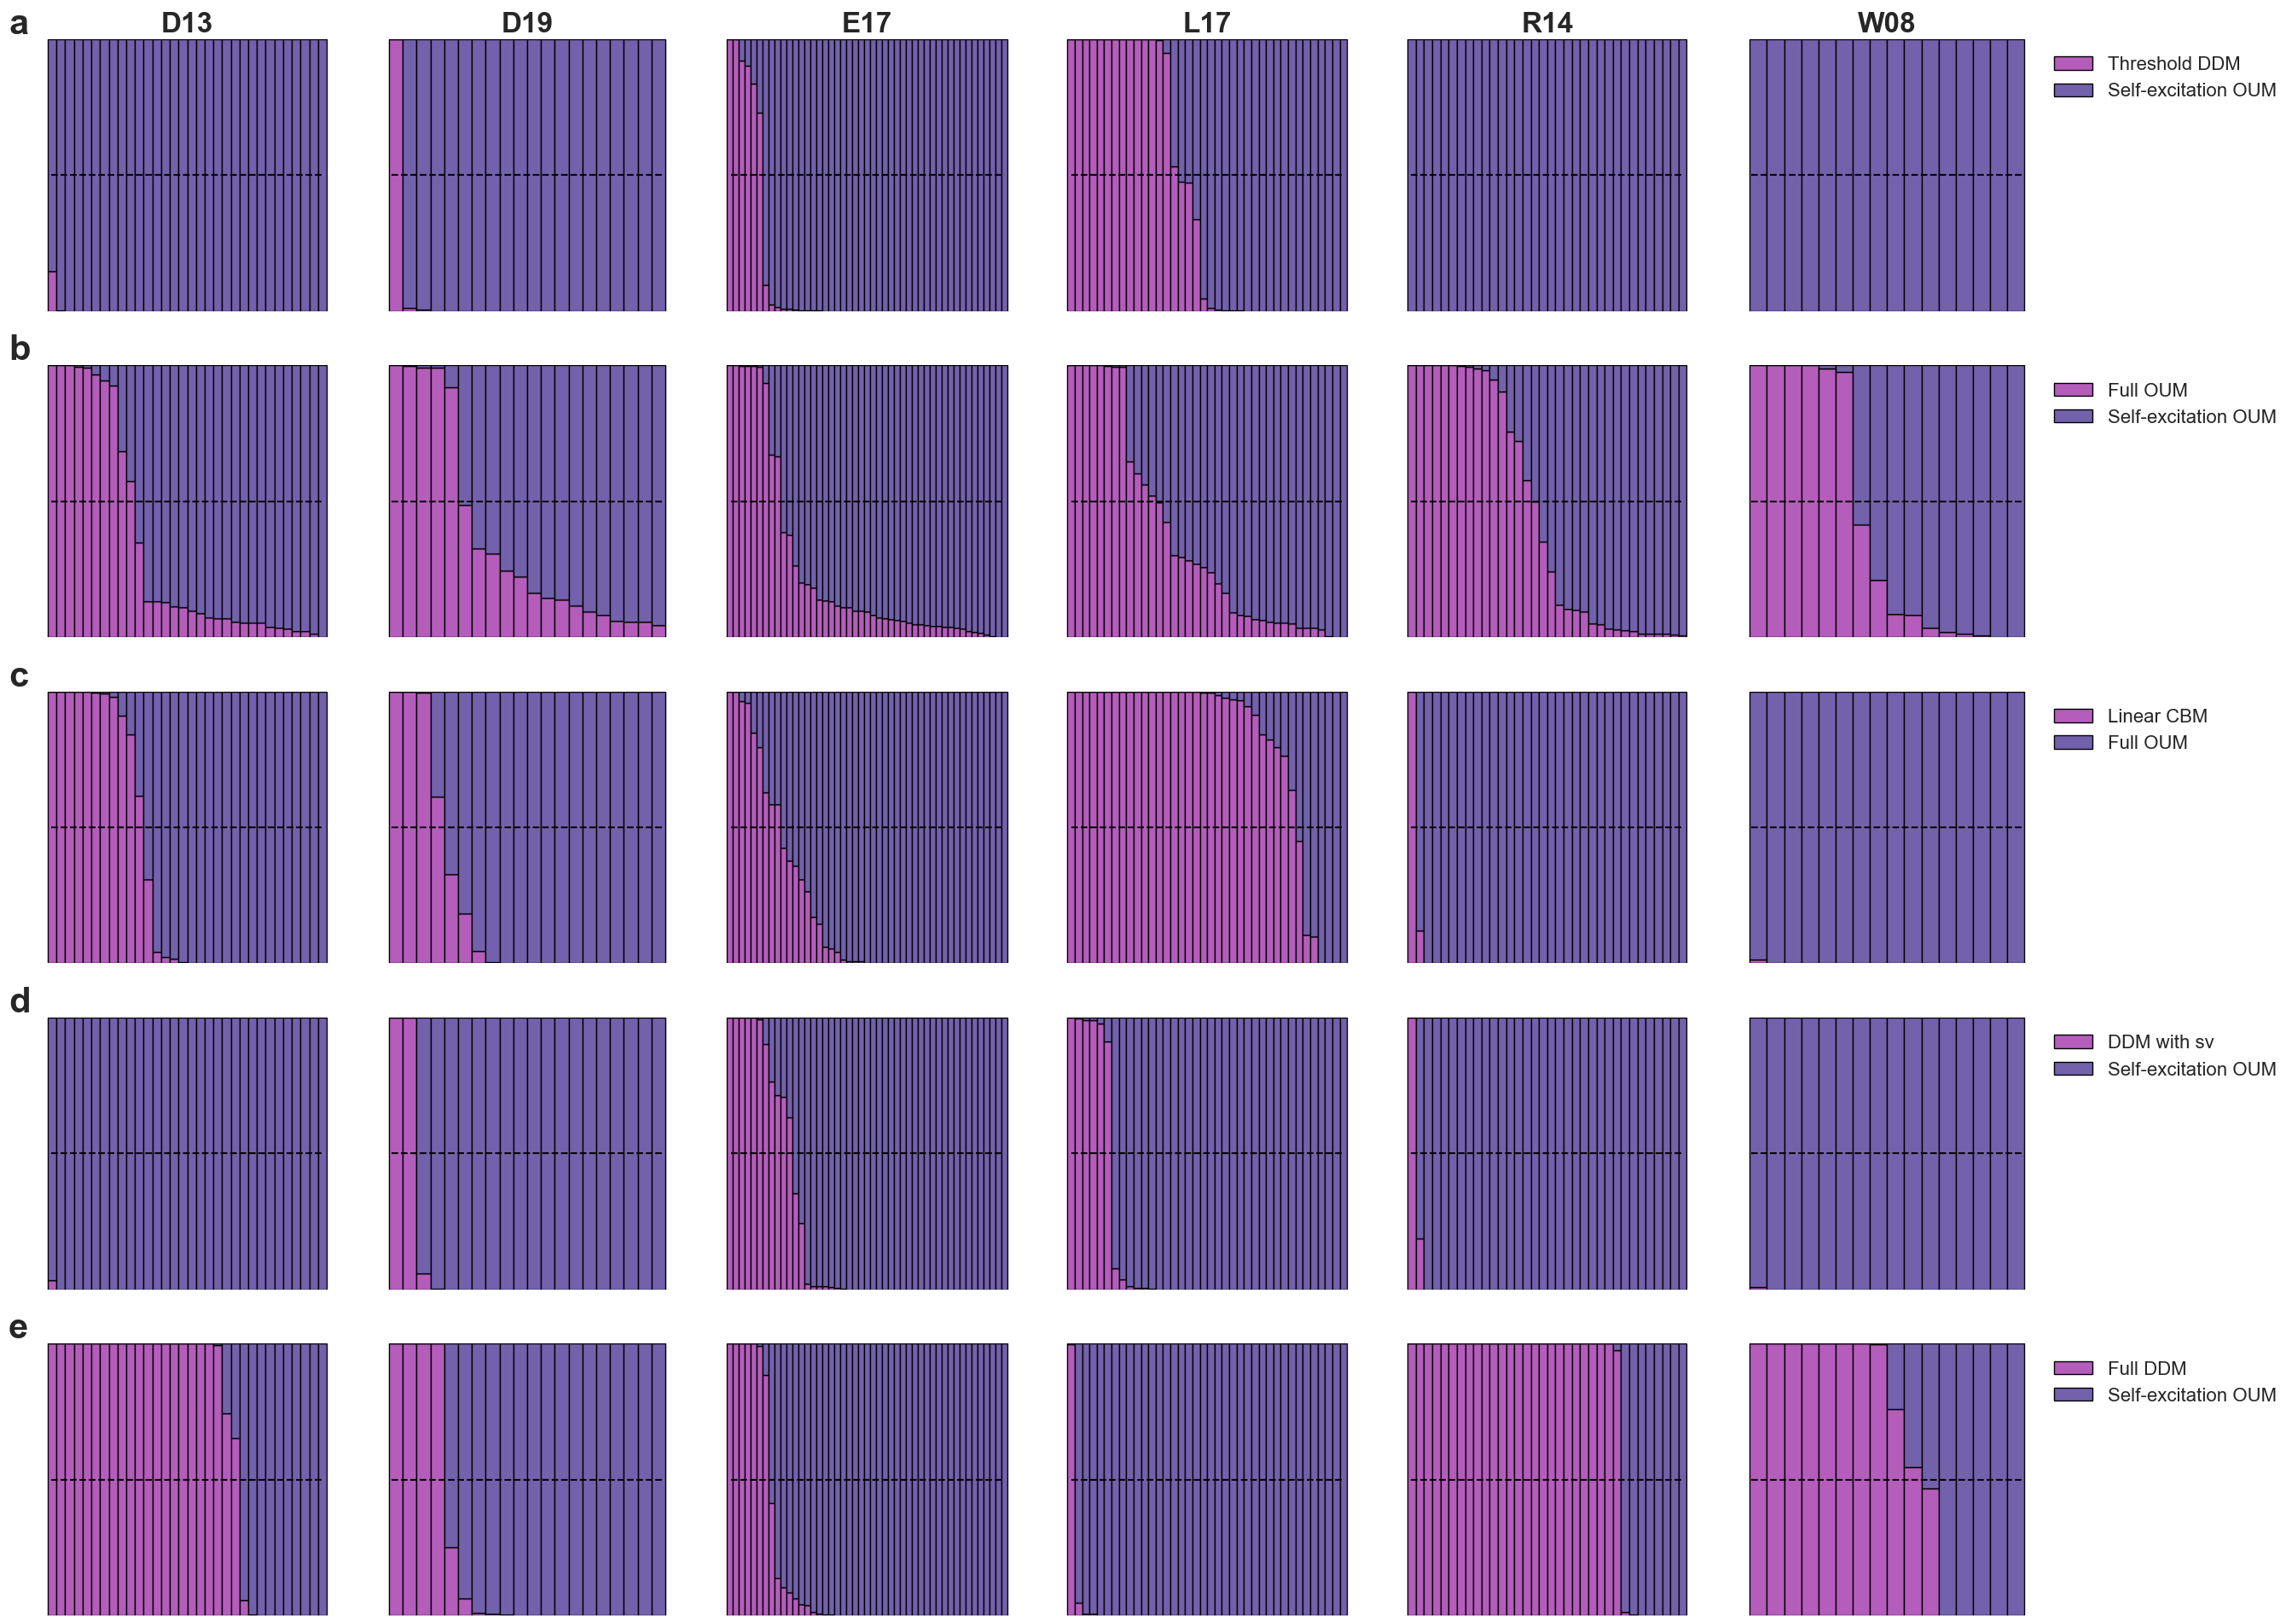

In [100]:
figure, axes = plt.subplots(5,6,figsize=(30, 24))
for i in range(5):
    axes[0,i].set_title(dataset_names[i],fontsize = 24, weight='bold', fontname='Arial')
    axes[i,0].text(x=-5,y=1.02, s=["a","b","c","d","e"][i], fontsize = 30, weight='bold')
axes[0,5].set_title(dataset_names[5],fontsize = 24, weight='bold', fontname='Arial')

plot_all_datasets_flat_all(["DDM2a2ter","OUM2k2ter"], ["Threshold DDM","Self-excitation OUM"], sortby = "OUM2k2ter",axes = axes[0,:])
plot_all_datasets_flat_all(["OUM2v2a2k2ter","OUM2v2k2ter"], ["Full OUM","Self-excitation OUM"], sortby = "OUM2v2k2ter",axes = axes[1,:])
plot_all_datasets_flat_all(["DDM2v2a2c2ter","OUM2v2a2k2ter"], ["Linear CBM","Full OUM"], sortby = "OUM2v2a2k2ter",axes = axes[2,:])
plot_all_datasets_flat_all(["DDM2v1sv2a2ter","OUM2v2k2ter"], ["DDM with sv","Self-excitation OUM"], sortby = "OUM2v2k2ter",axes = axes[3,:])
plot_all_datasets_flat_all(["DDMfull","OUM2v2k2ter"] , ["Full DDM","Self-excitation OUM"], sortby = "OUM2v2k2ter",axes = axes[4,:])


plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Supplementary Figures/sup_fig1.pdf")

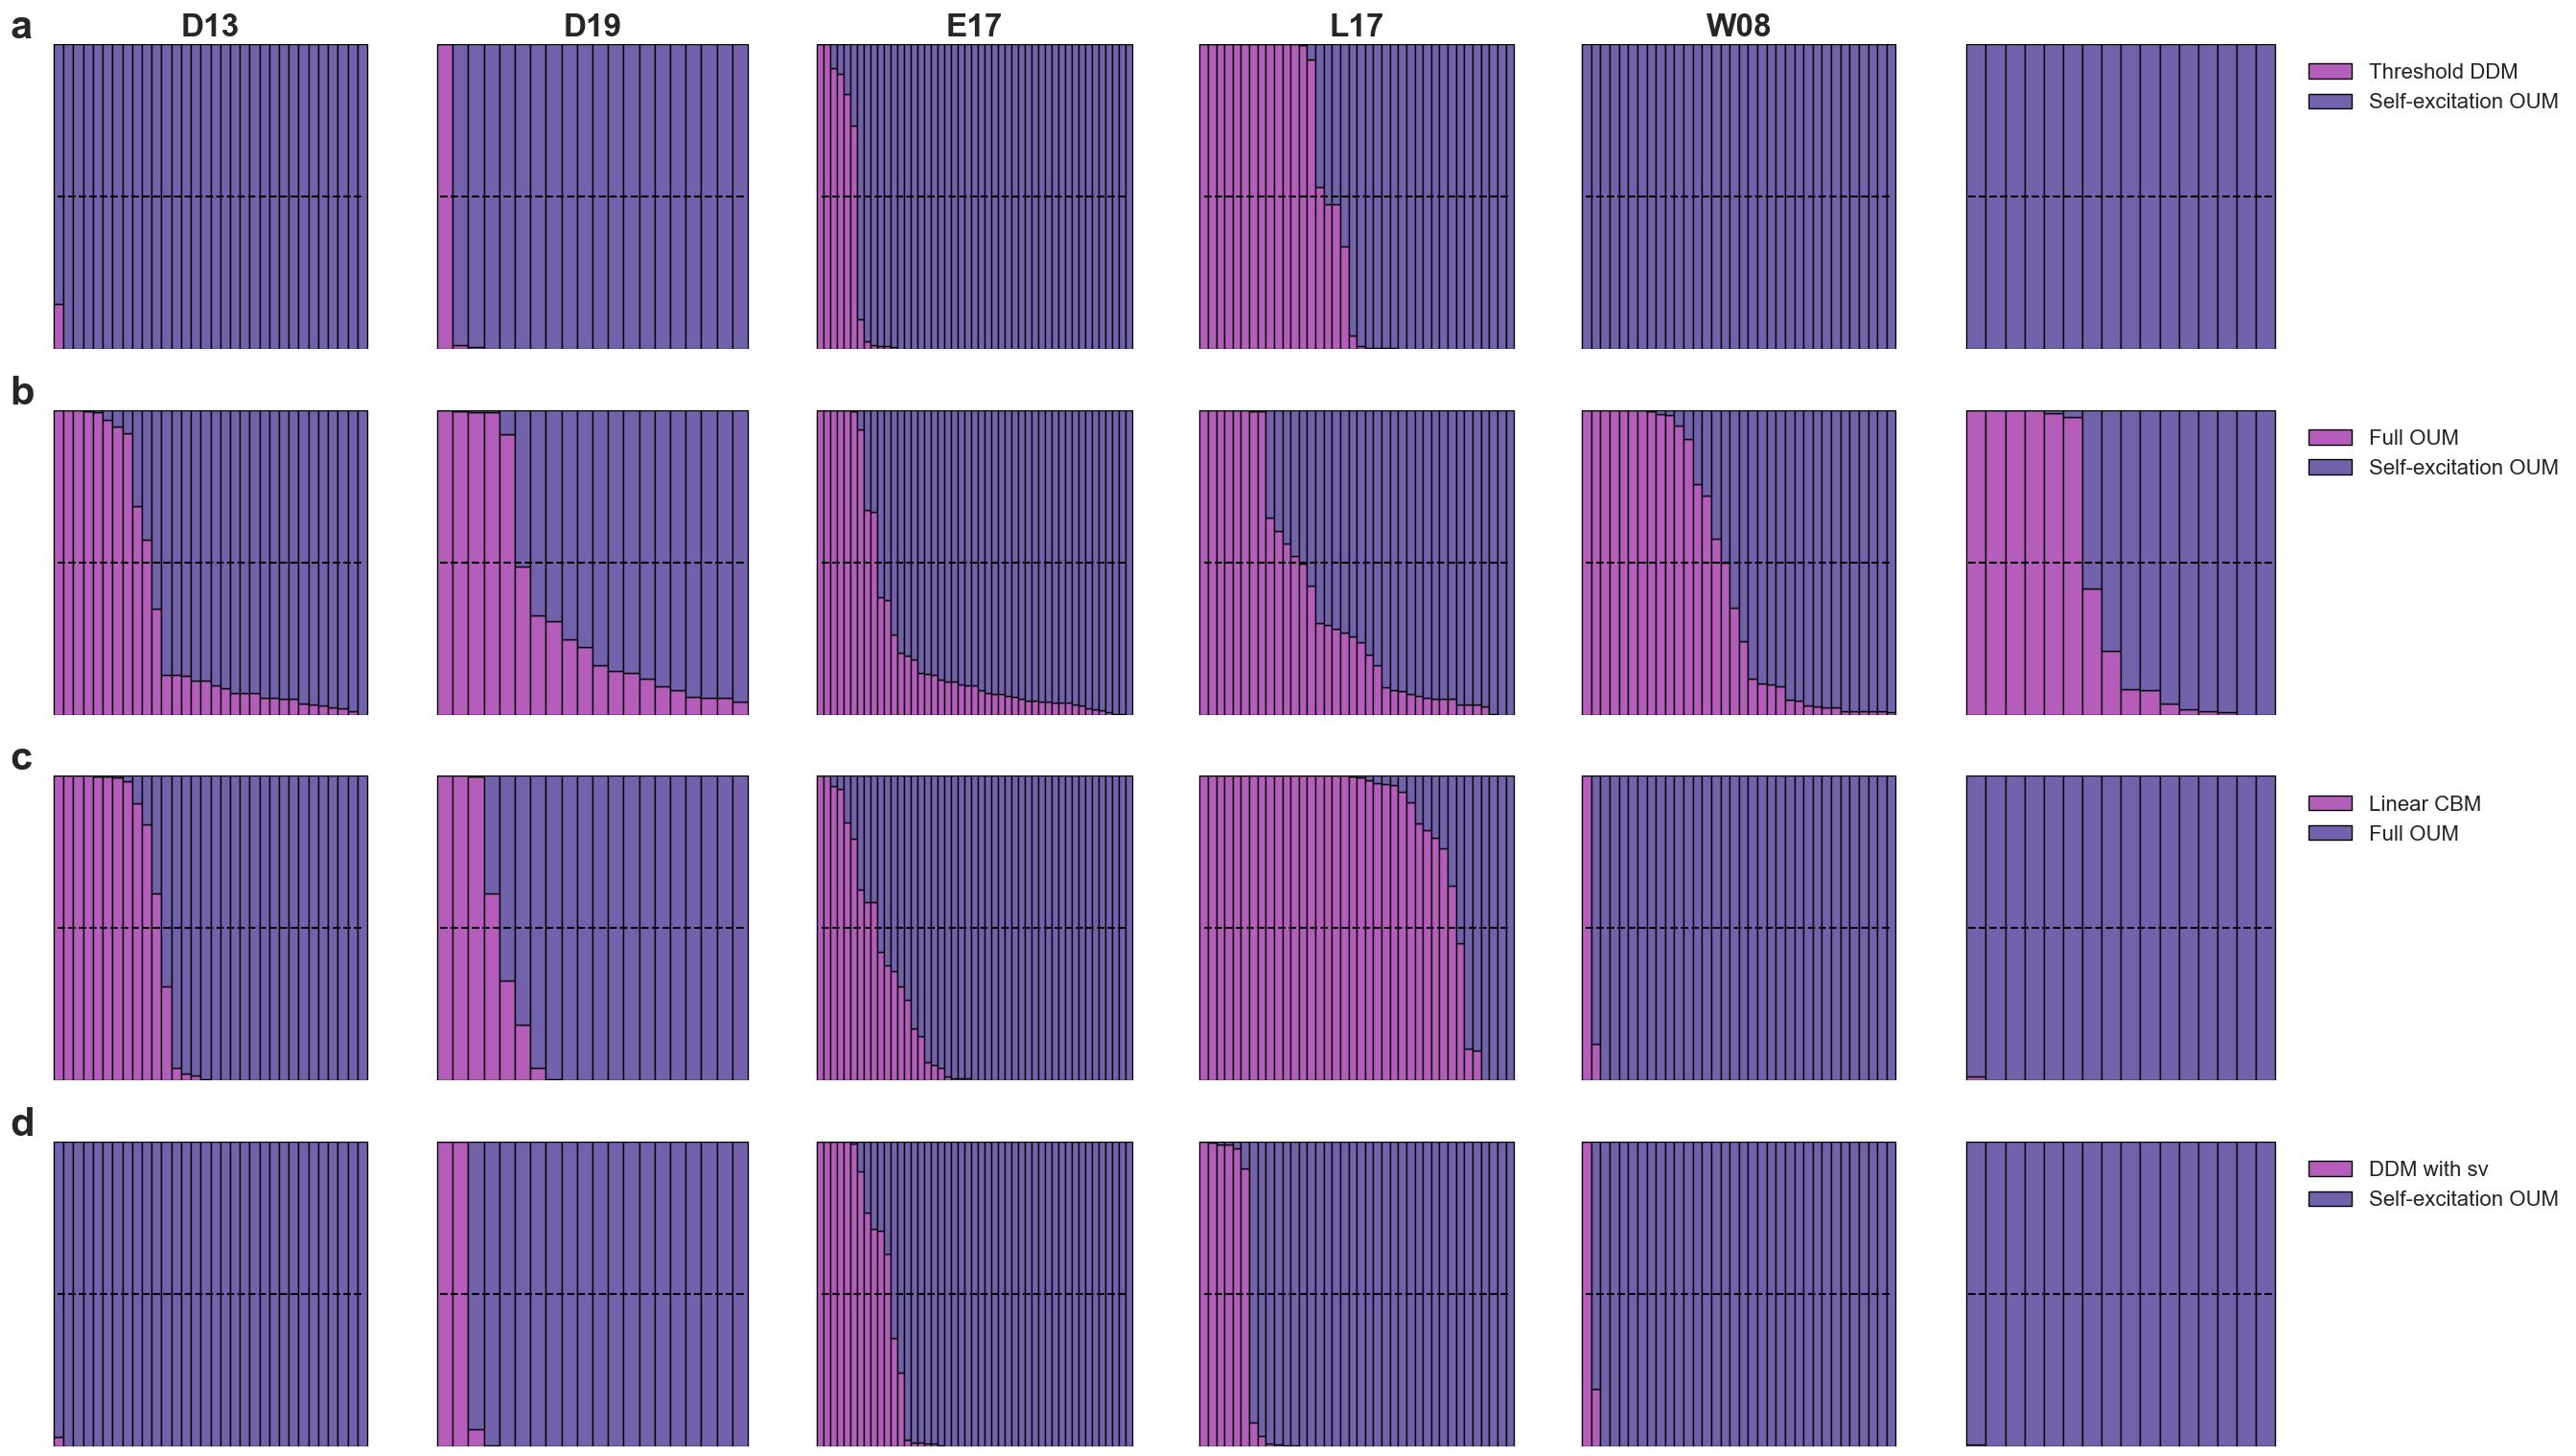

In [21]:
figure, axes = plt.subplots(4,6,figsize=(30, 19))
for i in range(4):
    axes[0,i].set_title(dataset_names[i],fontsize = 24, weight='bold', fontname='Arial')
    axes[i,0].text(x=-5,y=1.02, s=["a","b","c","d","e"][i], fontsize = 30, weight='bold')
axes[0,4].set_title(dataset_names[5],fontsize = 24, weight='bold', fontname='Arial')

plot_all_datasets_flat_all(["DDM2a2ter","OUM2k2ter"], ["Threshold DDM","Self-excitation OUM"], sortby = "OUM2k2ter",axes = axes[0,:])
plot_all_datasets_flat_all(["OUM2v2a2k2ter","OUM2v2k2ter"], ["Full OUM","Self-excitation OUM"], sortby = "OUM2v2k2ter",axes = axes[1,:])
plot_all_datasets_flat_all(["DDM2v2a2c2ter","OUM2v2a2k2ter"], ["Linear CBM","Full OUM"], sortby = "OUM2v2a2k2ter",axes = axes[2,:])
plot_all_datasets_flat_all(["DDM2v1sv2a2ter","OUM2v2k2ter"], ["DDM with sv","Self-excitation OUM"], sortby = "OUM2v2k2ter",axes = axes[3,:])


plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Supplementary Figures/sup_fig1.pdf")

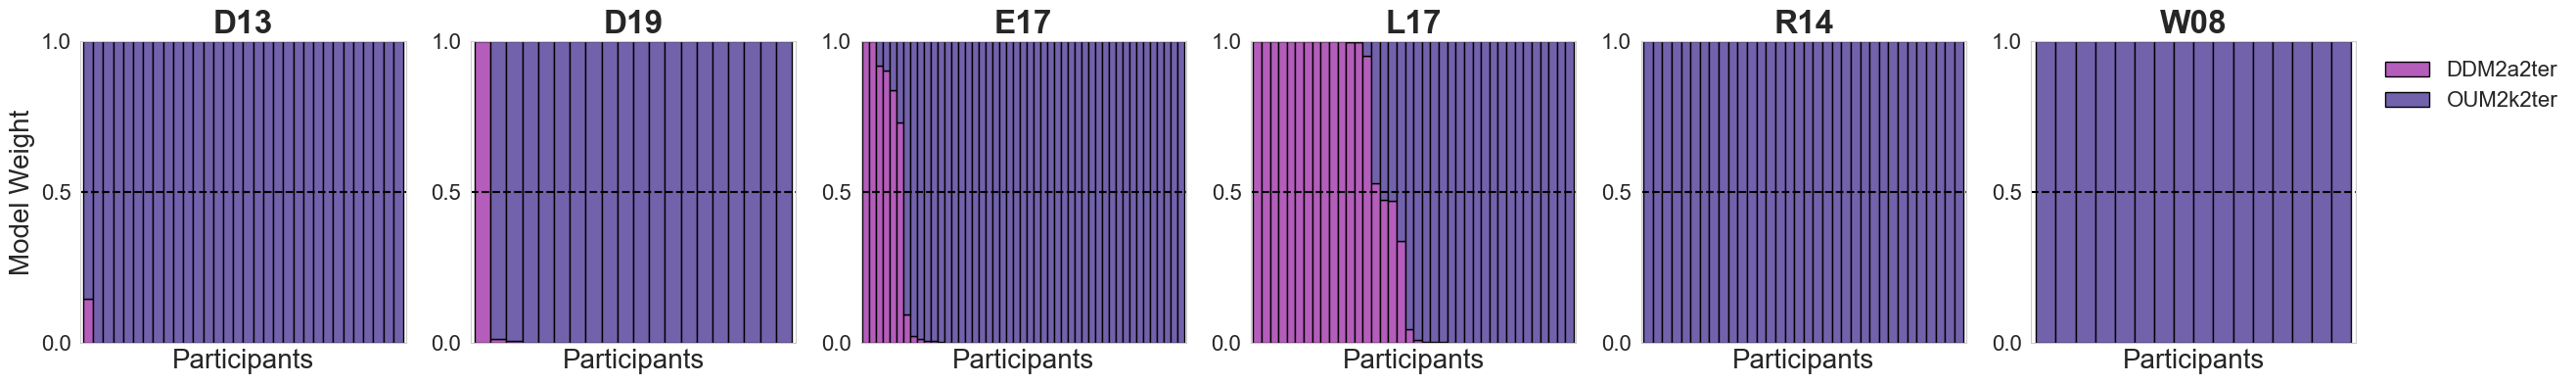

In [163]:
models = ["DDM2a2ter","OUM2k2ter"] 
labels = ["DDM2a2ter","OUM2k2ter"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2k2ter")

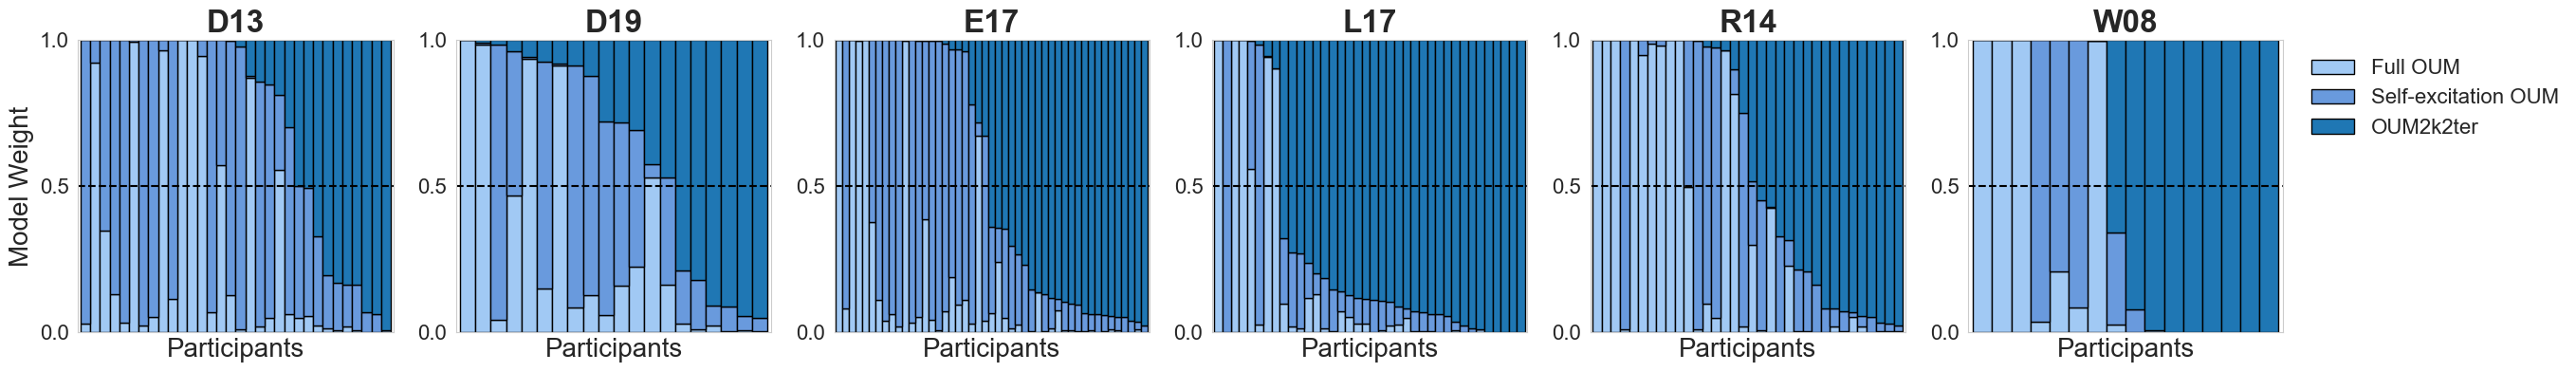

In [164]:
models = ["OUM2v2a2k2ter","OUM2v2k2ter","OUM2k2ter"] 
labels = ["Full OUM","Self-excitation OUM","OUM2k2ter"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2k2ter")

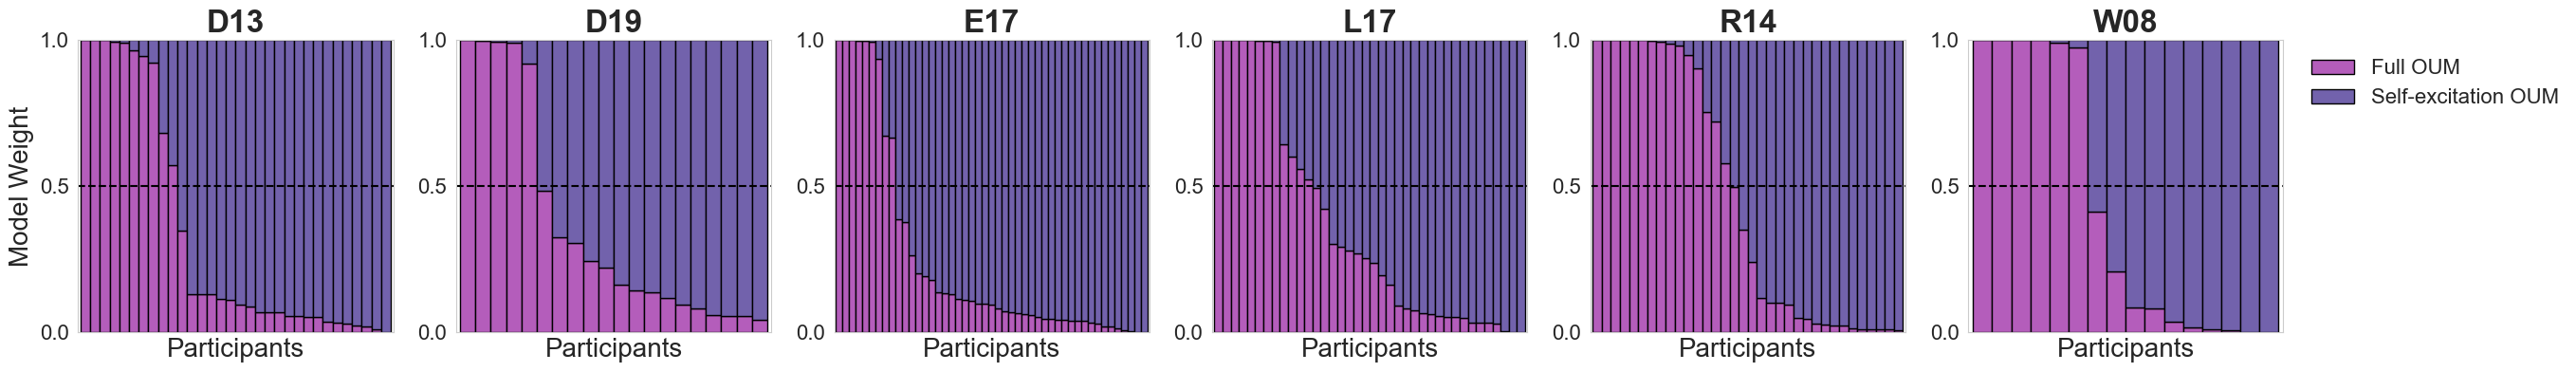

In [165]:
models = ["OUM2v2a2k2ter","OUM2v2k2ter"] 
labels = ["Full OUM","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

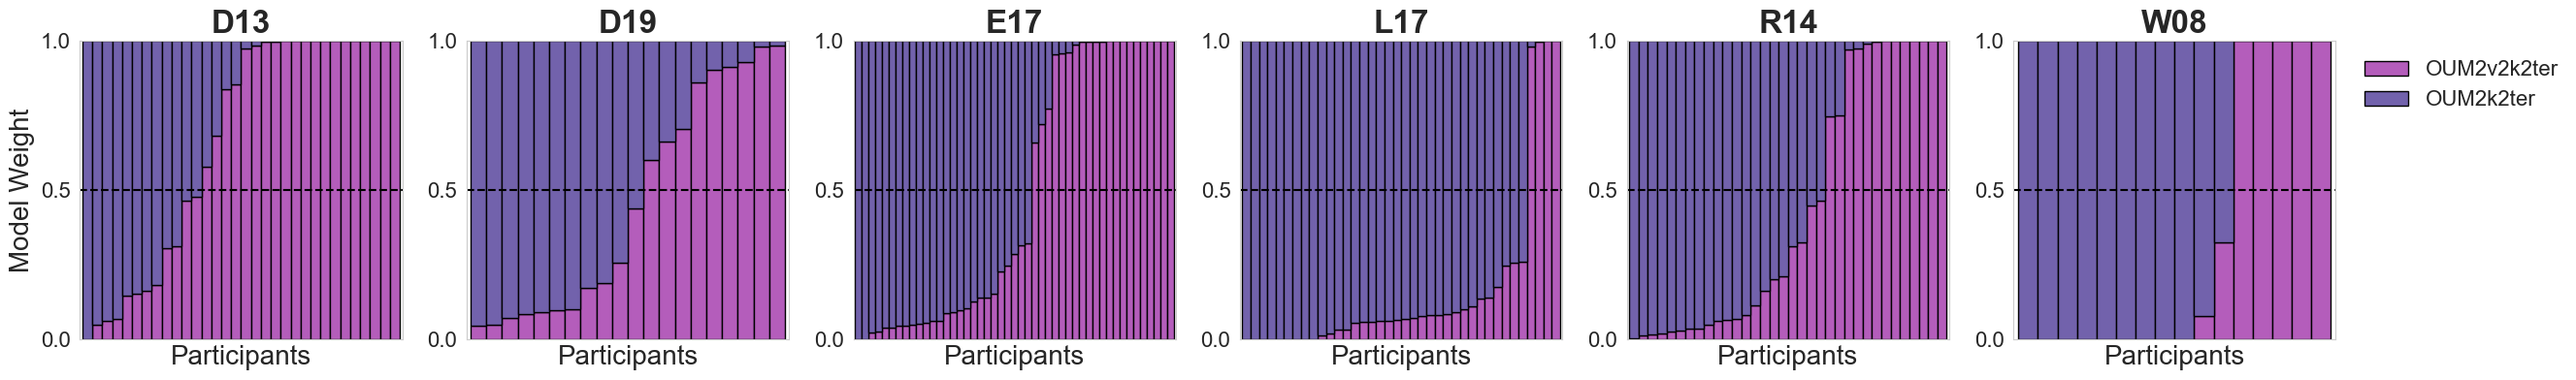

In [167]:
models = ["OUM2v2k2ter","OUM2k2ter"] 
labels = ["OUM2v2k2ter","OUM2k2ter"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

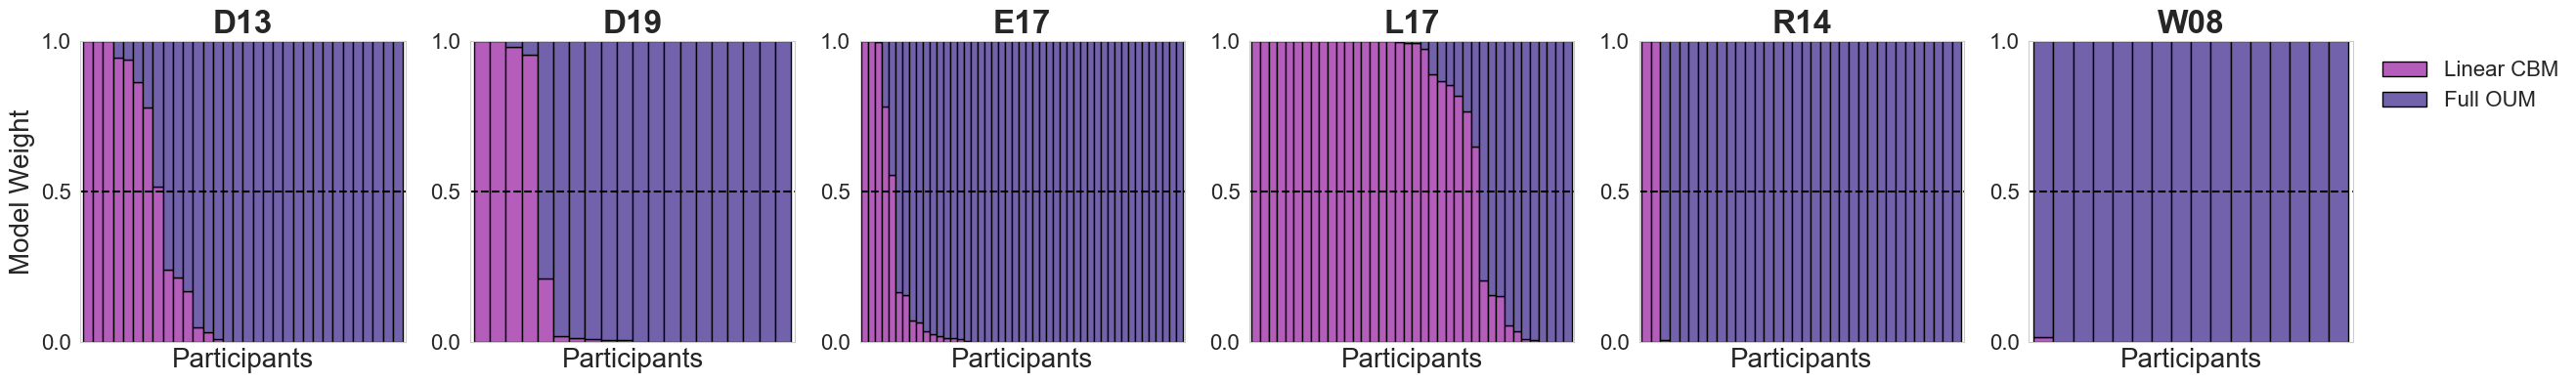

In [157]:
models = ["DDM2v2a2c2ter","OUM2v2k2ter"] 
labels = ["Linear CBM","Full OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

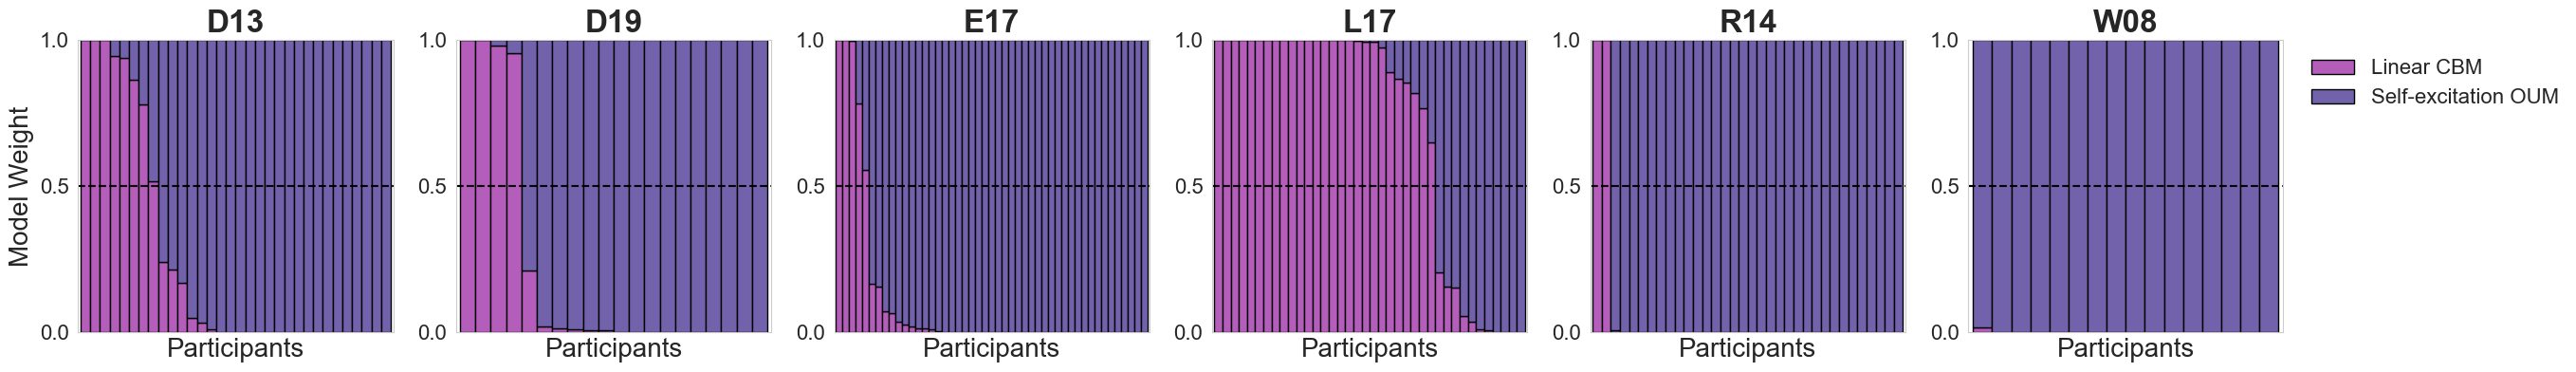

In [158]:

models = ["DDM2v2a2c2ter","OUM2v2k2ter"] 
labels = ["Linear CBM","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

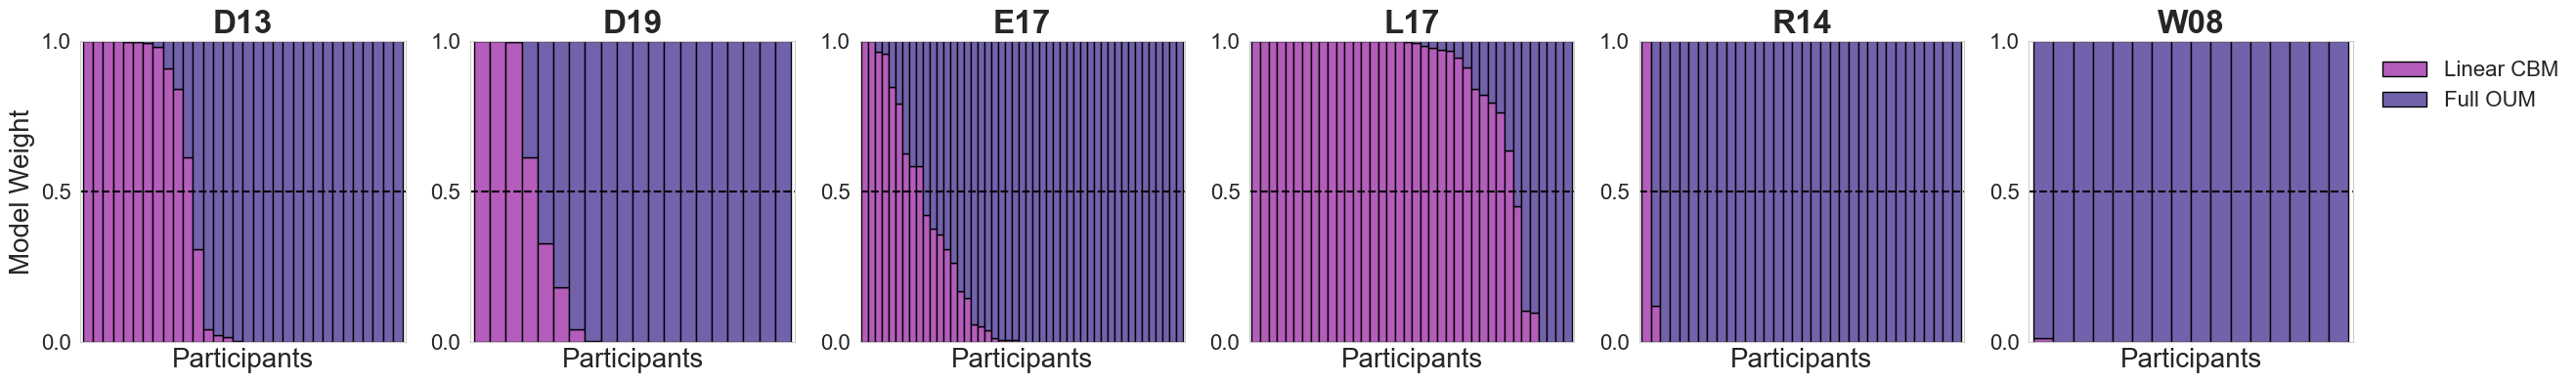

In [159]:
models = ["DDM2v2a2c2ter","OUM2v2a2k2ter"] 
labels = ["Linear CBM","Full OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2a2k2ter")

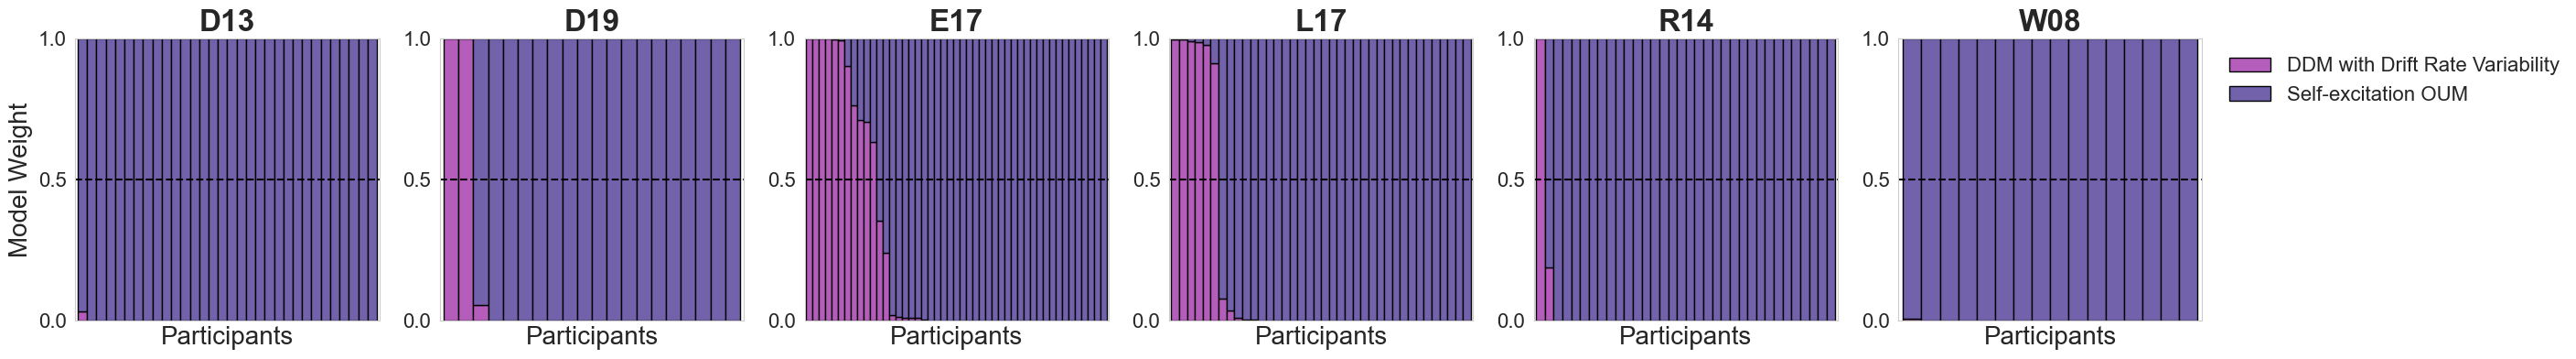

In [160]:
models = ["DDM2v1sv2a2ter","OUM2v2k2ter"] 
labels = ["DDM with Drift Rate Variability","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

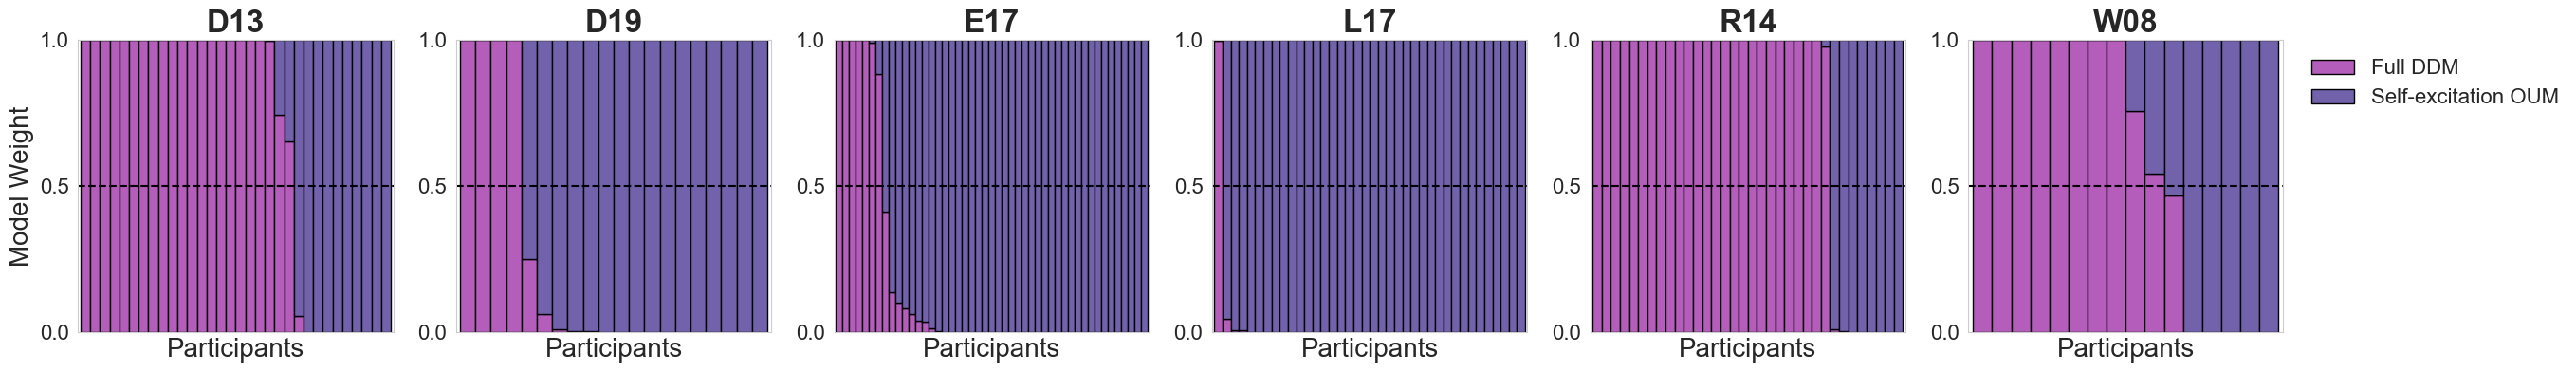

In [161]:
models = ["DDMfull","OUM2v2k2ter"] 
labels = ["Full DDM","Self-excitation OUM"] 
plot_all_datasets_flat(models, labels, sortby = "OUM2v2k2ter")

In [78]:
pal = sns.color_palette()

In [17]:
axes

array([[<Axes: title={'center': 'D13'}, xlabel='Participants', ylabel='Model Weight'>,
        <Axes: title={'center': 'D19'}, xlabel='Participants'>,
        <Axes: title={'center': 'E17'}, xlabel='Participants'>,
        <Axes: title={'center': 'L17'}, xlabel='Participants'>,
        <Axes: title={'center': 'R14'}, xlabel='Participants'>,
        <Axes: title={'center': 'W08'}, xlabel='Participants'>],
       [<Axes: title={'center': 'D13'}, xlabel='Participants', ylabel='Model Weight'>,
        <Axes: title={'center': 'D19'}, xlabel='Participants'>,
        <Axes: title={'center': 'E17'}, xlabel='Participants'>,
        <Axes: title={'center': 'L17'}, xlabel='Participants'>,
        <Axes: title={'center': 'R14'}, xlabel='Participants'>,
        <Axes: title={'center': 'W08'}, xlabel='Participants'>]],
      dtype=object)

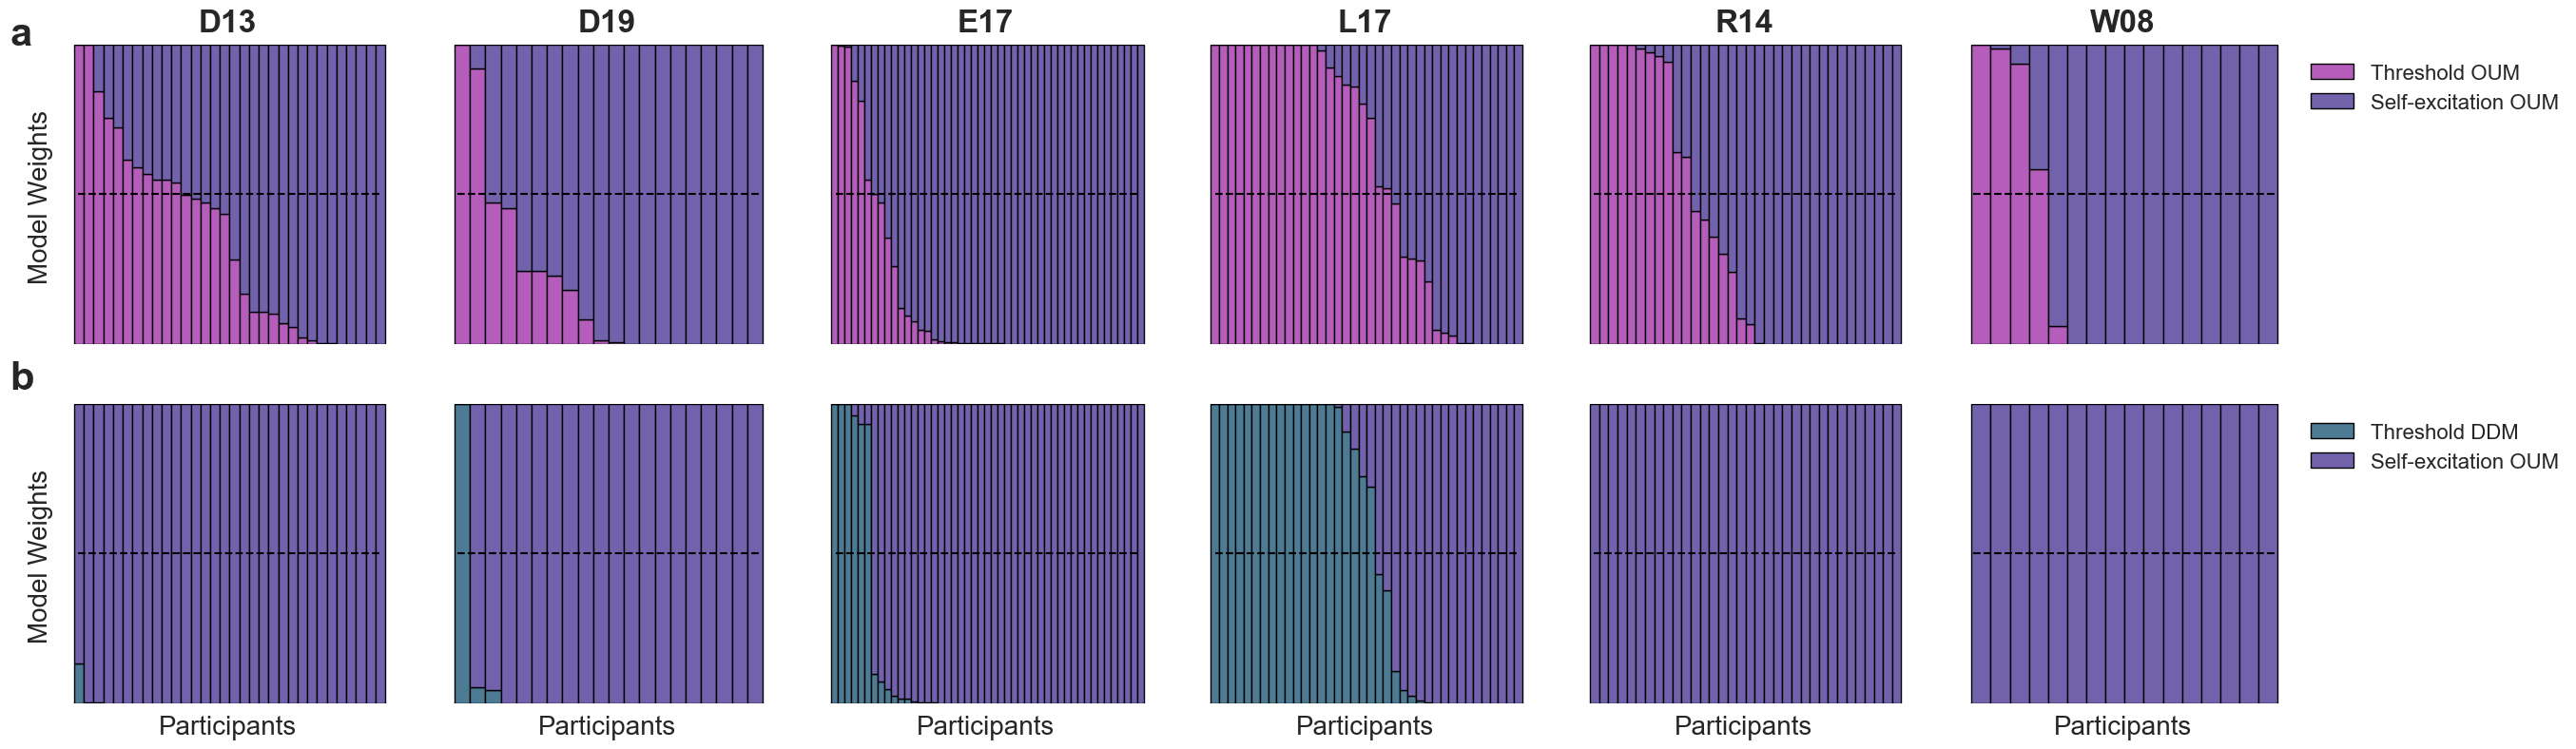

In [17]:
figure, axes = plt.subplots(2,6,figsize=(30,9))

models = ["OUM2v2a2ter","OUM2v2k2ter"] 
labels = ["Threshold OUM","Self-excitation OUM"] 
sortby = "OUM2v2k2ter"
plot_all_datasets_flat_fig(models, labels, sortby = "OUM2v2k2ter", axes = axes[0,:])

models = ["DDM2v2a2ter","OUM2v2k2ter"] 
labels = ["Threshold DDM","Self-excitation OUM"] 
plot_all_datasets_flat_fig(models, labels, sortby = "OUM2v2k2ter", axes = axes[1,:])

for i in range(6):
    axes[0,i].set_xlabel("")
    axes[1,i].set_title("")

    
#axes[0,0].set_ylabel('Model Weight', fontsize=20, fontname='Arial')
#axes[1,0].set_ylabel('Model Weight', fontsize=20, fontname='Arial')
#axes[0,0].annotate('', xy=(-0.2, -0.1), xycoords='axes fraction', xytext=(-0.2, 1.1),
#            arrowprops=dict(arrowstyle="<->", color='black'))
#axes[1,0].annotate('', xy=(-0.2, -0.1), xycoords='axes fraction', xytext=(-0.2, 1.1),
#            arrowprops=dict(arrowstyle="<->", color='black'))

plt.text(x=-103,y=2.2, s="a", fontsize = 30, weight='bold')
plt.text(x=-103,y=1.05, s="b", fontsize = 30, weight='bold')


plt.text(x=-102, y=0.22,s="Model Weights",size=20, rotation = "vertical")
plt.text(x=-102, y=1.42,s="Model Weights",size=20, rotation = "vertical")

loc = np.arange(6)*19.8+7.4-99
for i in range(6):
    plt.text(x=loc[i], y=-0.08,s="Participants",size=20, horizontalalignment='center',verticalalignment='center')
    plt.text(x=loc[i], y=2.27,s=dataset_names[i],size=24, horizontalalignment='center',verticalalignment='center',weight='bold')



plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Figures/fig3ab.pdf",bbox_inches = 'tight')

In [37]:
def transform_df_OUM_dif(df_SAT):
    
    params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]

    df_SAT1 = df_SAT[["Drift Rate Speed", "Boundary Separation Speed", "Non-decision Time Speed", "Self-excitation Speed"]]
    df_SAT1 = pd.DataFrame(np.array(df_SAT1), columns = params)
    #df_SAT1["SAT"] = ["Speed"]*len(df_SAT1)

    df_SAT2 = df_SAT[["Drift Rate Accuracy", "Boundary Separation Accuracy", "Non-decision Time Accuracy", "Self-excitation Accuracy"]]
    df_SAT2 = pd.DataFrame(np.array(df_SAT2), columns = params)
    #df_SAT2["SAT"] = ["Accuracy"]*len(df_SAT2)
    
    df_SAT = df_SAT1-df_SAT2
    df_SAT_melted = pd.melt(df_SAT, #d_vars = ["SAT"], 
                    value_vars=params,
                    var_name = "Parameter", value_name = "Difference")
    

    return df_SAT_melted

In [40]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['D13', 'D19', 'E17', 'L17', 'R14', 'W08']

OUM_all = pd.DataFrame()
for i in range(6):
    
    df_SAT = pd.read_csv('results/OUMfullresult'+datasets[i]+'.csv')
    if datasets[i] =='Wagenmakers2008':
        df_SAT = df_SAT.groupby(by="Participant").mean()

    df_SAT_melted = transform_df_OUM_dif(df_SAT)
    df_SAT_melted["Dataset"] = dataset_names[i]
    
    OUM_all = pd.concat((OUM_all,df_SAT_melted))
    
#g = sns.catplot(kind = "box", data=OUM_all, x="Dataset", y="Difference", col="Parameter",hue = "Dataset")
#g.set_xticklabels(rotation=30)

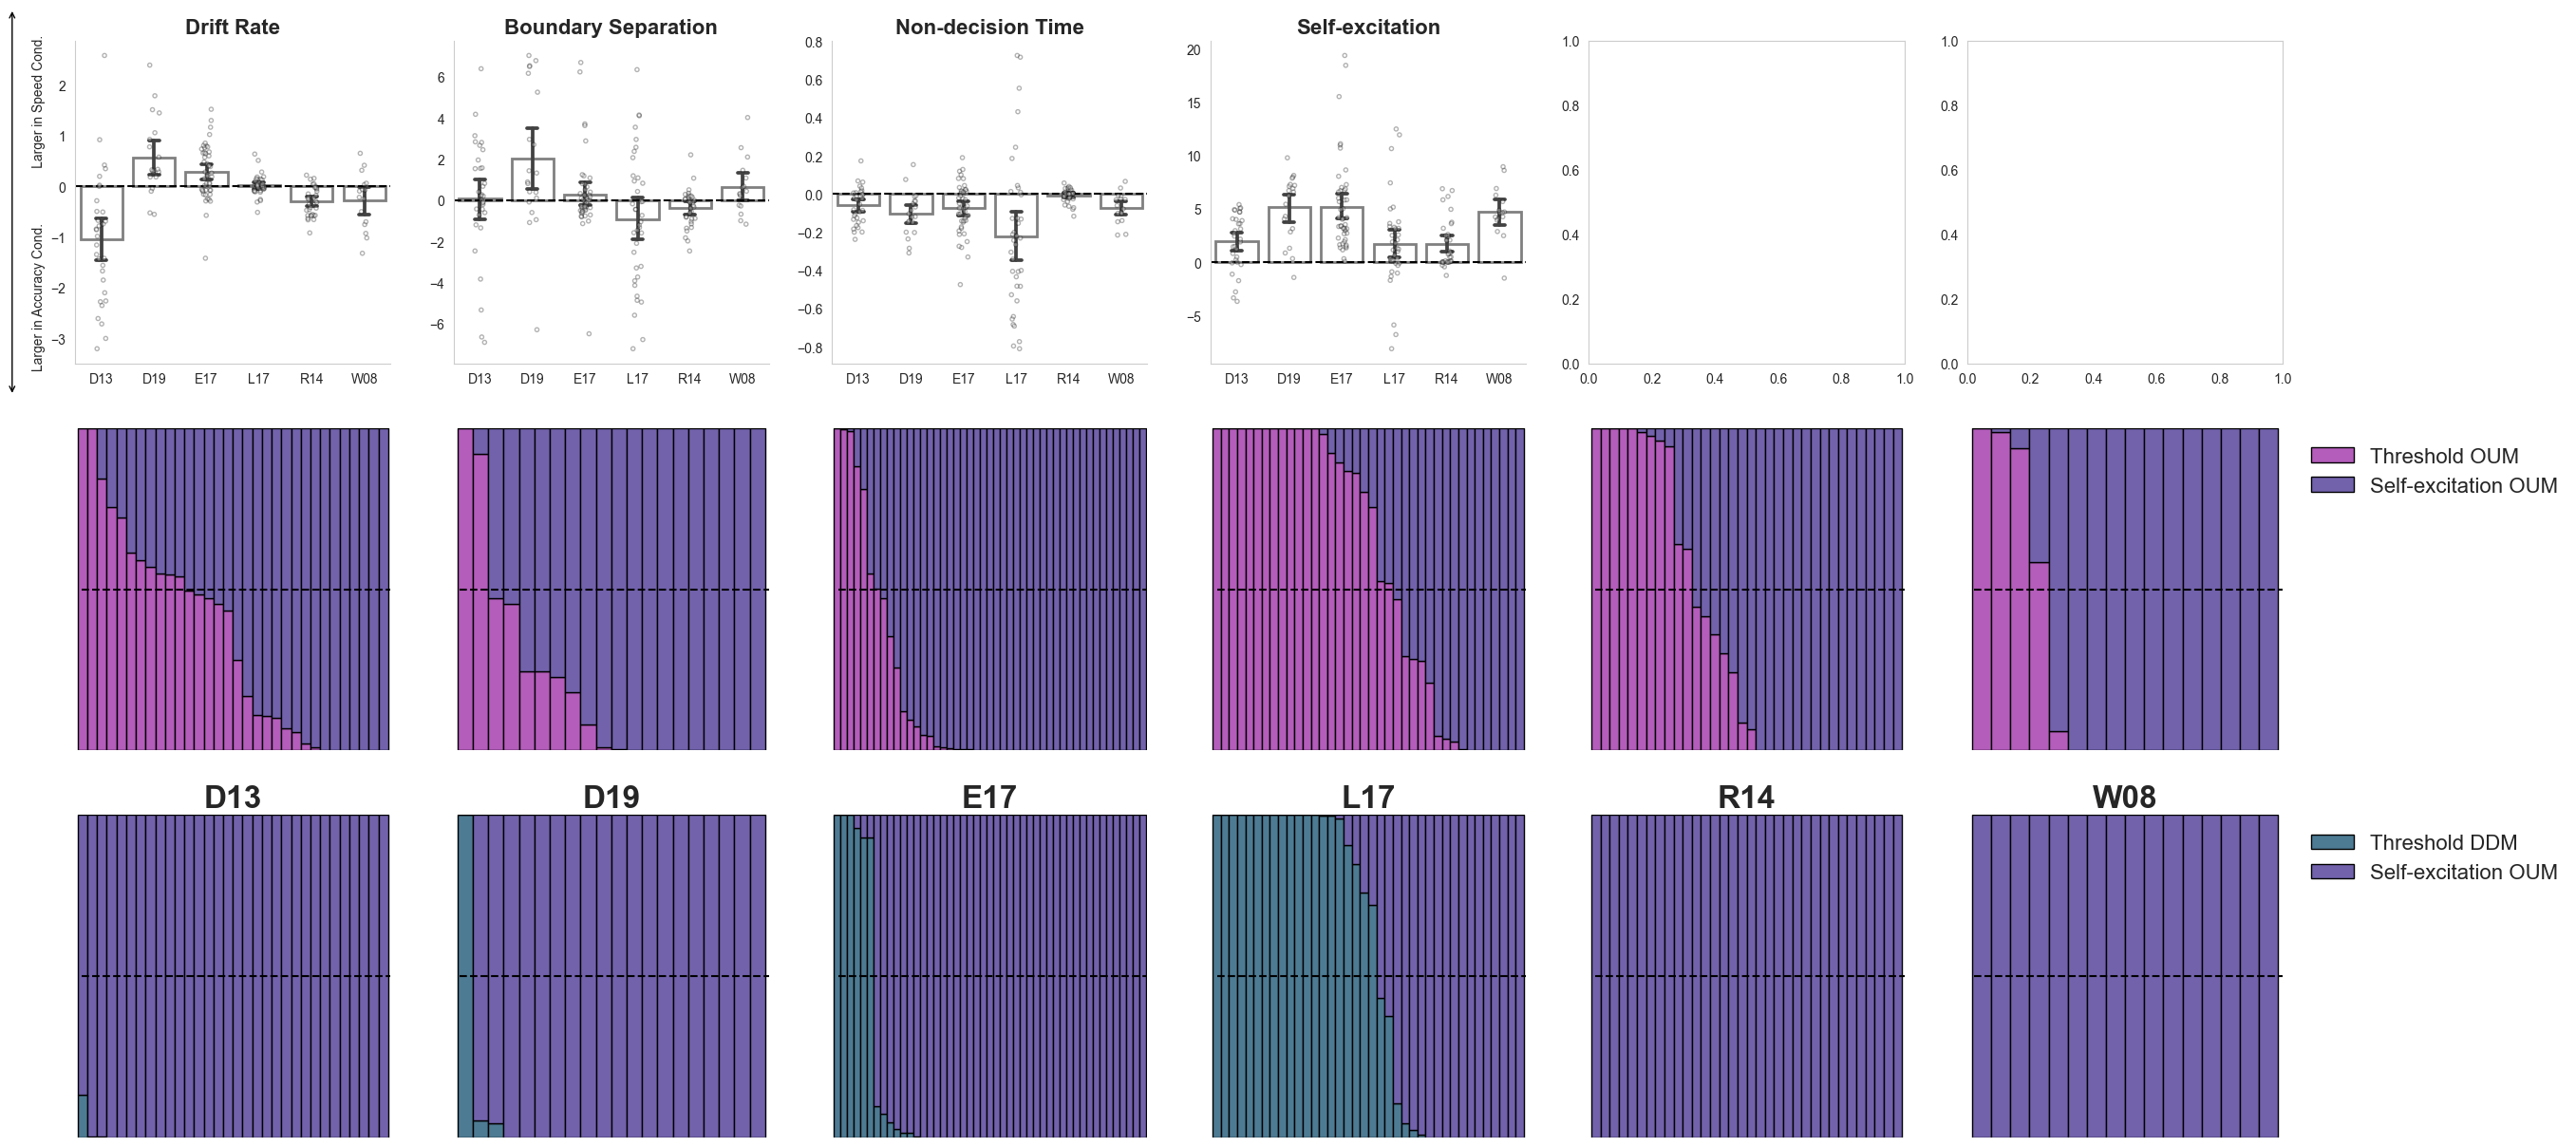

In [47]:
figure, axes = plt.subplots(3,6,figsize=(30,15))

## 2a
params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]


for i in range(4):
    sns.stripplot(ax = axes[0,i], data=OUM_all[OUM_all["Parameter"]==params[i]], x="Dataset", y="Difference",hue = "Dataset", palette=["white"]*6, alpha=.3,edgecolor="black",linewidth=1,size = 3)

    sns.barplot(ax = axes[0,i], data=OUM_all[OUM_all["Parameter"]==params[i]], x="Dataset", y="Difference",edgecolor=["grey"]*6, palette=["white"]*6,linewidth=2,capsize=.2)

    axes[0,i].spines[['right', 'top']].set_visible(False)
    axes[0,i].axhline(y=0,linestyle="--",color='black') 
    axes[0,i].set_xlabel("")
    axes[0,i].set_ylabel("")
    axes[0,i].set_title(params[i], font = "Arial", size = 16, weight='bold') 
    axes[0,i].get_legend().remove()
axes[0,0].set_ylabel("Larger in Accuracy Cond.               Larger in Speed Cond.", font = "Arial", size = 10)

#plt.arrow(x=-4, y=0, dx=0, dy=1,shape = "full")
axes[0,0].annotate('', xy=(-0.2, -0.1), xycoords='axes fraction', xytext=(-0.2, 1.1),
            arrowprops=dict(arrowstyle="<->", color='black'))



#2bc
models = ["OUM2v2a2ter","OUM2v2k2ter"] 
labels = ["Threshold OUM","Self-excitation OUM"] 
sortby = "OUM2v2k2ter"
plot_all_datasets_flat_fig(models, labels, sortby = "OUM2v2k2ter", axes = axes[1,:])

models = ["DDM2v2a2ter","OUM2v2k2ter"] 
labels = ["Threshold DDM","Self-excitation OUM"] 
plot_all_datasets_flat_fig(models, labels, sortby = "OUM2v2k2ter", axes = axes[2,:])

for i in range(6):
    axes[0,i].set_xlabel("")
    axes[1,i].set_title("")
    


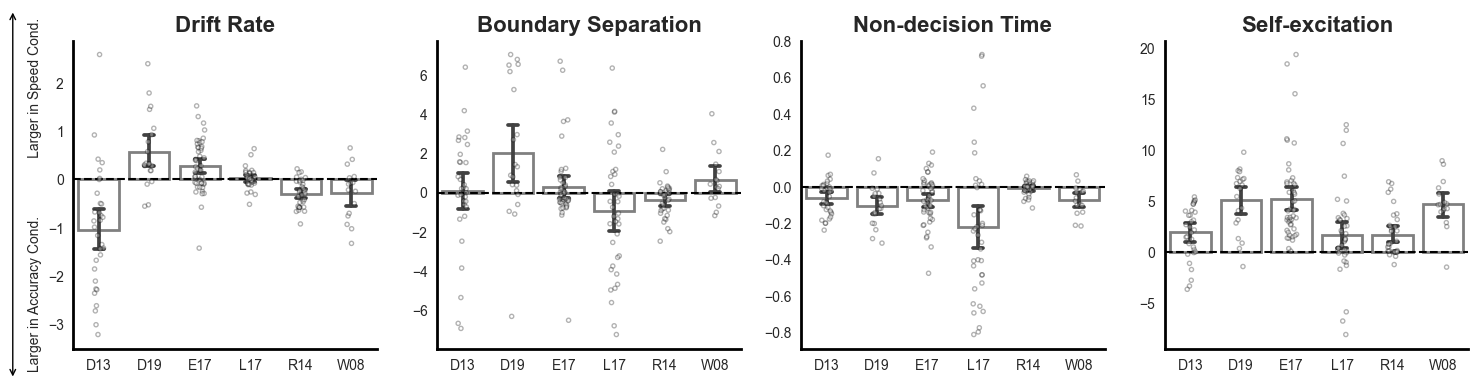

In [72]:
params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]

fig, ax = plt.subplots(1,4,figsize=(18,4))

for i in range(4):
    sns.stripplot(ax = ax[i], data=OUM_all[OUM_all["Parameter"]==params[i]], x="Dataset", y="Difference",hue = "Dataset", palette=["white"]*6, alpha=.3,edgecolor="black",linewidth=1,size = 3)

    sns.barplot(ax = ax[i], data=OUM_all[OUM_all["Parameter"]==params[i]], x="Dataset", y="Difference",edgecolor=["grey"]*6, palette=["white"]*6,linewidth=2,capsize=.2)

    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].axhline(y=0,linestyle="--",color='black') 
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_title(params[i], font = "Arial", size = 16, weight='bold') 
    ax[i].get_legend().remove()
    ax[i].spines["left"].set_linewidth(2)
    ax[i].spines["left"].set_color("black")

    ax[i].spines["bottom"].set_linewidth(2)
    ax[i].spines["bottom"].set_color("black")

ax[0].set_ylabel("Larger in Accuracy Cond.               Larger in Speed Cond.", font = "Arial", size = 10)

#plt.arrow(x=-4, y=0, dx=0, dy=1,shape = "full")
ax[0].annotate('', xy=(-0.2, -0.1), xycoords='axes fraction', xytext=(-0.2, 1.1),
            arrowprops=dict(arrowstyle="<->", color='black'))
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Figures/fig2.pdf")

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12, 6))
DDM_SAT_plot(ax=axes[0])
OUM_SAT_plot(ax=axes[1])
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.text(x=-1.8,y=3.5, s="a", fontsize = 16, weight='bold')
plt.text(x=0,y=3.5, s="b", fontsize = 16, weight='bold')

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Figures/fig1ab.pdf")

In [42]:
OUM_all

,Parameter,Difference,Dataset
0,Drift Rate,-0.744406,D13
1,Drift Rate,0.420909,D13
2,Drift Rate,0.000000,D13
3,Drift Rate,-2.102901,D13
4,Drift Rate,0.022561,D13
...,...,...,...
59,Self-excitation,4.851177,W08
60,Self-excitation,8.598301,W08
61,Self-excitation,8.943536,W08
62,Self-excitation,4.656148,W08
